In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_speech=pd.read_csv('dfspeech_cleaned_all.csv')
# df_speech['date'] = [datetime.strptime(x,'%d %b %Y') for x in df_speech.date]
# df_speech['Date (by month)'] = df_speech['date'].to_numpy().astype('datetime64[M]')

In [3]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=7000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(df_speech['content_nouns'])

lda_model = LatentDirichletAllocation(n_components=30, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print('Visualize the topics:')
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne',sort_topics=False)

Visualize the topics:


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      119.070190   64.655502       1        1   0.004361
1       54.382130  109.799164       2        1   0.012423
2     -161.423965 -103.744957       3        1  24.397916
3     -135.370758   36.673065       4        1   0.004361
4      177.317215  -66.872452       5        1   0.012917
5      -16.436356  142.453796       6        1  21.987860
6       31.052383  204.777573       7        1   0.011220
7      -25.024384 -186.083466       8        1   0.004361
8      -68.157486   20.934038       9        1   0.004361
9       -3.751695    4.961509      10        1   0.004361
10    -114.470009 -179.605469      11        1   0.989395
11    -110.729126  -40.476776      12        1   0.004361
12      42.552418  -42.789406      13        1   0.825740
13     -10.661536   71.922211      14        1   1.730379
14     112.652969  -16.279951      15        1   0.004361
15    -195.499146  -25.853945      16        1   0.023512
16    -207.165924   66.070419      17        1   0.004361
17      10.217649 -110.752060      18        1   0.004361
18     -81.255081   96.477776      19        1   0.004361
19     -77.253441  192.755219      20        1   2.040991
20     182.353027  110.412880      21        1   0.004361
21      89.766510  -93.997673      22        1   0.004361
22     -36.483528  -52.542774      23        1   0.035461
23     -72.052170 -112.144821      24        1   0.004361
24     144.822769 -150.811508      25        1   0.780223
25    -148.475357  135.678162      26        1   0.004361
26     189.811615   17.382956      27        1   2.181729
27      56.555355   33.755768      28        1   0.022652
28      58.988537 -178.376541      29        1   0.004361
29     110.556717  164.236694      30        1  44.882165, topic_info=            Term         Freq        Total Category  logprob  loglift
3416      people  7313.000000  7313.000000  Default  30.0000  30.0000
5166        year  3626.000000  3626.000000  Default  29.0000  29.0000
2233      health  1806.000000  1806.000000  Default  28.0000  28.0000
681         care  1779.000000  1779.000000  Default  27.0000  27.0000
4782        time  3154.000000  3154.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2102  government   803.112652  1827.039318  Topic30  -5.2038  -0.0208
2233      health   763.758014  1806.560832  Topic30  -5.2541  -0.0598
4792       today   753.418002  1780.136085  Topic30  -5.2677  -0.0587
1254         day   708.595946  1500.911824  Topic30  -5.3290   0.0506
171      america   624.461207  1364.996584  Topic30  -5.4554   0.0191

[2164 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
14        3  0.703449    aboard
14       13  0.351724    aboard
23        3  0.976564       abu
26       25  0.460188  academia
26       30  0.460188  academia
...     ...       ...       ...
5166     14  0.035847      year
5166     20  0.025645      year
5166     25  0.001654      year
5166     27  0.009927      year
5166     30  0.572731      year

[3137 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [4]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=60):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

# Show top 60 keywords for each topic
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=100)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords.head(3)

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 90,Word 91,Word 92,Word 93,Word 94,Word 95,Word 96,Word 97,Word 98,Word 99
Topic 0,law,year,people,time,court,president,country,thing,life,woman,...,everybody,child,order,decade,story,office,opportunity,progress,commission,education
Topic 1,buchenwald,elie,concentration,photograph,inmate,uncle,allegation,sexism,plate,temperature,...,try,division,question,join,progress,partner,friend,value,month,speak
Topic 2,people,nation,world,country,war,state,force,today,work,time,...,isil,order,endure,respect,president,group,intelligence,secure,lead,fear


In [5]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns

# index names
docnames = ["Speech" + str(i) for i in range(len(df_speech))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.head(3)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,dominant_topic
Speech0,0.0,0.0,0.73,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,2
Speech1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.82,29
Speech2,0.0,0.0,0.19,0.0,0.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.13,5


In [6]:
# Assign topic description to topic number
df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df_speech, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

df_topic_theme = df_sent_topic[['Date (by month)','date','content_nouns', 'dominant_topic']]
topic_index_list=[29,2,5,26,19,13,10]
df_8topic_theme=df_topic_theme.loc[df_topic_theme['dominant_topic'].isin(topic_index_list)]

def label_theme(row):
    if row['dominant_topic'] == 29 :
        return 'Economy/Education/Job/Family'
    if row['dominant_topic'] == 2 :
        return 'War/Conflict/Religion/Nation'
    if row['dominant_topic'] == 5 :
        return 'Policy/Govenment/Foreign Affairs'
    if row['dominant_topic'] == 26:
        return 'Insurance/Health'
    if row['dominant_topic']  == 19:
        return 'Iran/Sanction'
    if row['dominant_topic'] == 13:
        return 'Veteran Affairs'
    if row['dominant_topic'] == 10:
        return 'Oil/Gas/Energy/Viecle/Climate'
#     if row['dominant_topic'] == 12:
#         return 'Music/Art'

df_8topic_theme['dominant_topic_theme'] = df_8topic_theme.apply (lambda row: label_theme(row), axis=1)
df_8topic_theme=df_8topic_theme.rename(columns={"Date (by month)": "date_by_month"})
print(f'Keep speeches that belong to themes: Economy/Education/Job/Family,War/Conflict/Religion/Nation,Policy/Govenment/Foreign Affairs,Insurance/Health,Iran/Sanction,Veteran Affairs. The number of remained speeches is {len(df_8topic_theme)} after removing speeches that are not classified to these themes.')
df_8topic_theme.head(4)

Keep speeches that belong to themes: Economy/Education/Job/Family,War/Conflict/Religion/Nation,Policy/Govenment/Foreign Affairs,Insurance/Health,Iran/Sanction,Veteran Affairs. The number of remained speeches is 421 after removing speeches that are not classified to these themes.


,date_by_month,date,content_nouns,dominant_topic,dominant_topic_theme
0,2009-01-01,2009-01-20,stand today task u trust bestow sacrifice bear...,2,War/Conflict/Religion/Nation
1,2009-01-01,2009-01-24,year administration midst crisis call action w...,29,Economy/Education/Job/Family
2,2009-01-01,2009-01-26,television television interview hisham house w...,5,Policy/Govenment/Foreign Affairs
3,2009-02-01,2009-02-04,remark executive compensationbarackobamaremark...,29,Economy/Education/Job/Family


In [7]:
#prepare the df for charts
month_topic_count = pd.DataFrame(columns=['Time', 'dominant_topic', 'num of speeches'])
for month in df_8topic_theme.date_by_month.unique():
    for dominant_topic_num in topic_index_list:
        dict1={'Time':month, 'dominant_topic':dominant_topic_num, 'num of speeches':df_8topic_theme[(df_8topic_theme.dominant_topic==dominant_topic_num)&(df_8topic_theme.date_by_month==month)].shape[0]}
        month_topic_count=month_topic_count.append(dict1,ignore_index=True)

month_topic_count = month_topic_count.astype({"Time":"datetime64","dominant_topic":"int","num of speeches":"int"})
month_topic_count['topic_theme'] = month_topic_count.apply (lambda row: label_theme(row), axis=1)

month_topic_count.to_csv('month_topic_count.csv')

[Text(0.5, 1.0, 'Topic distributions over time')]

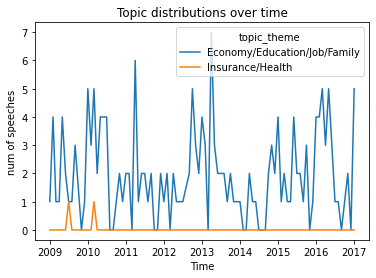

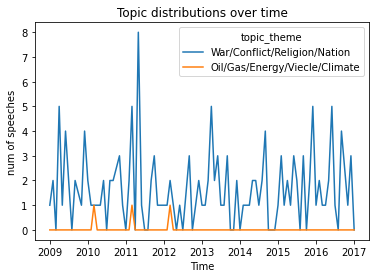

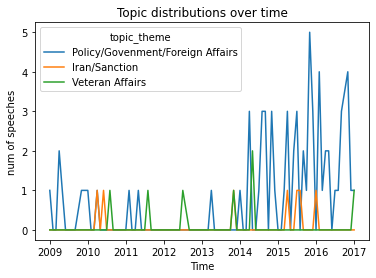

In [8]:
# month_topic_count=pd.read_csv('month_topic_count.csv')
#draw chart

def get_topic_distribution(startDate='01/01/2009',endDate='01/01/2017',topic_num=topic_index_list,ax=None):
    df=month_topic_count[month_topic_count['dominant_topic'].isin(topic_num) & (month_topic_count['Time']>=startDate) &  (month_topic_count['Time']<=endDate)]
    fig=sns.lineplot(data=df, x="Time", y="num of speeches",hue="topic_theme",ax=ax).set(title = "Topic distributions over time")
#     sns.set(rc={'figure.figsize':(15,7)})
#     sns.set(font_scale=1.2)
    return fig

chart1, ax1 = plt.subplots()
chart2, ax2 = plt.subplots()
chart3, ax3 = plt.subplots()

# default parameters:(startDate='01/01/2009',endDate='01/01/2017',topic_num=topic_index_list,ax=None)
get_topic_distribution(topic_num=[29,26],ax=ax1)
get_topic_distribution(topic_num=[2,10],ax=ax2)
get_topic_distribution(topic_num=[5,19,13],ax=ax3)
